In [1]:
from contextual_distros import ContextualLatentSpaceGMM
import torch
from matplotlib import pyplot as plt

In [2]:
device = torch.device("cpu")

0.75


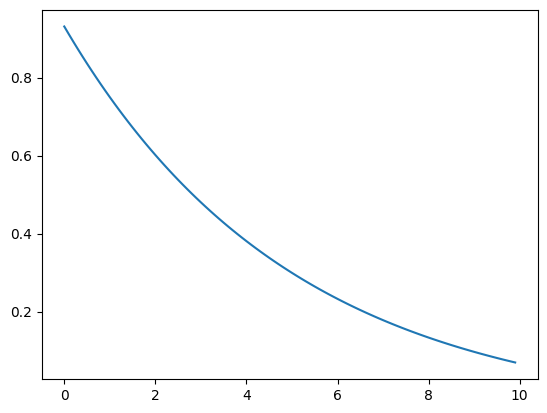

In [3]:
import numpy as np
x = np.arange(0, 10, 0.1)

a = 0.2
b = 0.75 - np.exp(-a) # a + 0.75 

y = np.exp(-a * x) + b # -a * x + b

plt.plot(x, y)

print(y[10])

In [61]:
context_size = 5
z_dim = 2

context = torch.rand((context_size, z_dim), device=device) * 3
# context = torch.ones((context_size, z_dim), device=device) * 1.5
print(context.shape)

p_z = ContextualLatentSpaceGMM(context)

print(p_z.mu.shape)
print(p_z.sigma.shape)
print([g.mean for g in p_z.gaussians])

torch.Size([5, 2])
torch.Size([2])
torch.Size([2])
[tensor([1.3150, 1.7400]), tensor([ 1.3150, -1.7400]), tensor([-1.3150,  1.7400]), tensor([-1.3150, -1.7400])]


torch.Size([10000, 2])


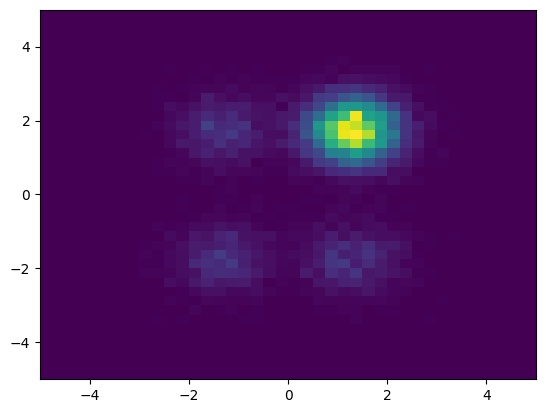

In [62]:
num_samples = 10000

samples = p_z.sample((num_samples,))

print(samples.shape)

plt.hist2d([z[0] for z in samples], [z[1] for z in samples], bins=40, range=[(-5, 5), (-5, 5)])
plt.ylim(-5, 5)
plt.xlim(-5, 5)
plt.show()